# Forecasting. Exponential smoothing. Holt's method. Additive fading trend
## Kirill Zakharov
### 22.02.2021

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
passengers = pd.read_csv('ausair.csv', index_col='Year', parse_dates=True)
passengers.head()

,Passengers
Year,
1970-01-01,7.32
1971-01-01,7.33
1972-01-01,7.80
1973-01-01,9.38
1974-01-01,10.66


## Exponential smoothing

In [3]:
def exp_sm1(df, alpha):
    res = [df[0]]
    for t in range(1, len(df)):
        res.append(alpha * df[t] + (1 - alpha) * res[t-1])
    return res

def forecast(df, alpha, h):
    forecast = exp_sm1(df, alpha)
    return [forecast[-1]]*h

In [4]:
date1 = passengers.index[-1] + pd.DateOffset(years=1)
date2 = date1 + pd.DateOffset(years=9)
dates = pd.date_range(date1, date2, freq='YS')
dates

DatetimeIndex(['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01',
               '2025-01-01', '2026-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [5]:
num = passengers.values
h = 10
alpha = 0.3

forecast1 = pd.DataFrame(dates)
forecast1.columns = ['Year']
forecast1 = forecast1.set_index('Year')
# forecast1['Passengers'] = forecast(num[0, 0], h, alpha, passengers)
forecast1['Passengers'] = forecast(num[:,0],alpha, h)

### Smoothing

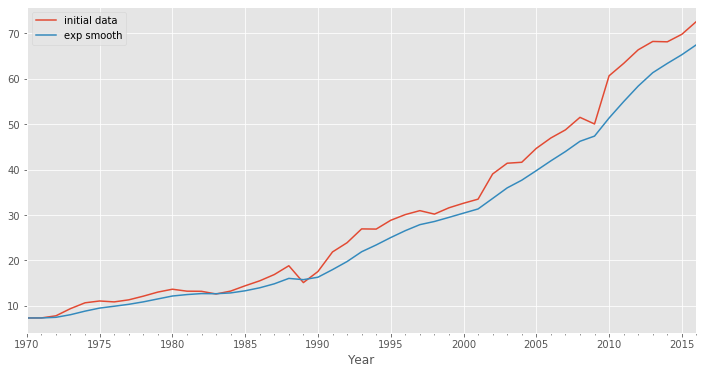

In [6]:
d = pd.DataFrame(pd.date_range('1970-01-01', '2016-01-01', freq='YS'))
d.columns = ['Year']
d = d.set_index('Year')

d['Passengers'] = exp_sm1(num[:,0], alpha)
passengers['Passengers'].plot(figsize=(12, 6), label='initial data')
d['Passengers'].plot(label='exp smooth')
plt.legend()
plt.show()

### Forecast

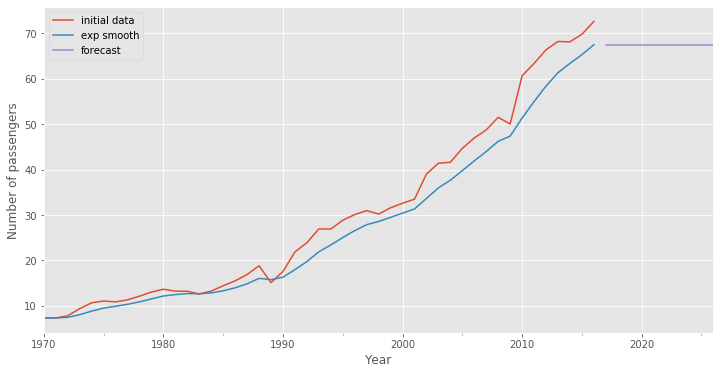

In [7]:
passengers['Passengers'].plot(figsize=(12, 6), label='initial data')
d['Passengers'].plot(label='exp smooth', figsize=(12, 6))
forecast1['Passengers'].plot(label='forecast')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

## Holt's method

In [8]:
def forecast_H2(df, alpha, beta, h):
    res = [df[0]]
    l, b = df[0], df[1] - df[0]
    for t in range(1, len(df)):
        prev_l, l = l, alpha*df[t] + (1-alpha)*(l + b)
        b = beta*(l-prev_l) + (1-beta)*b
        res.append(l + b)
    
    forecast = res
    for t in range(len(df), len(df)+h):
        prev_l, l = l, alpha*forecast[t-1] + (1-alpha)*(l + b)
        b = beta*(l-prev_l) + (1-beta)*b
        forecast.append(l + b)
        
    return forecast[:-h], forecast[-h:]

In [9]:
alpha = 0.59
beta = 0.43
h = 10

forecast2 = pd.DataFrame(dates)
forecast2.columns = ['Year']
forecast2 = forecast2.set_index('Year')
smooth, forecast2['Passengers'] = forecast_H2(num[:, 0], alpha, beta, h)

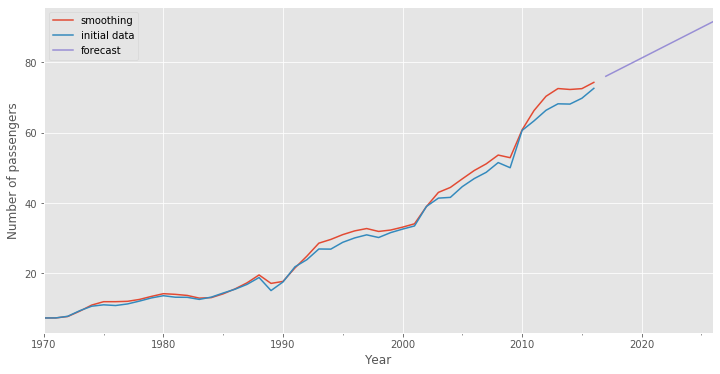

In [10]:
d = pd.DataFrame(pd.date_range('1970-01-01', '2016-01-01', freq='YS'))
d.columns = ['Year']
d = d.set_index('Year')

d['Passengers'] = smooth
d['Passengers'].plot(label='smoothing', figsize=(12, 6))

passengers['Passengers'].plot(figsize=(12, 6), label='initial data')
forecast2['Passengers'].plot(label='forecast')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

## Additive fading trend

In [11]:
def add_trend(df, alpha, beta, phi, h):
    res = [df[0]]
    l, b = df[0], df[1] - df[0]
    phi_Sum = 0
    
    for i in range(1, h+1):
        phi_Sum += phi**i
        
    for t in range(1, len(df)):
        prev_l, l = l, alpha*df[t] + (1-alpha)*(l + phi*b)
        b = beta*(l-prev_l) + (1-beta)*phi*b
        res.append(l + phi_Sum*b)
    
    forecast = res
    for t in range(len(df), len(df)+h):
        prev_l, l = l, alpha*forecast[t-1] + (1-alpha)*(l+phi*b)
        b = beta*(l-prev_l) + (1-beta)*phi*b
        forecast.append(l + phi_Sum*b)
        
    return forecast[:-h], forecast[-h:]

In [12]:
alpha = 0.39
beta = 0.1
phi = 0.9
h = 10

forecast3 = pd.DataFrame(dates)
forecast3.columns = ['Year']
forecast3 = forecast3.set_index('Year')
smooth, forecast3['Passengers'] = add_trend(num[:, 0], alpha, beta, phi, h)

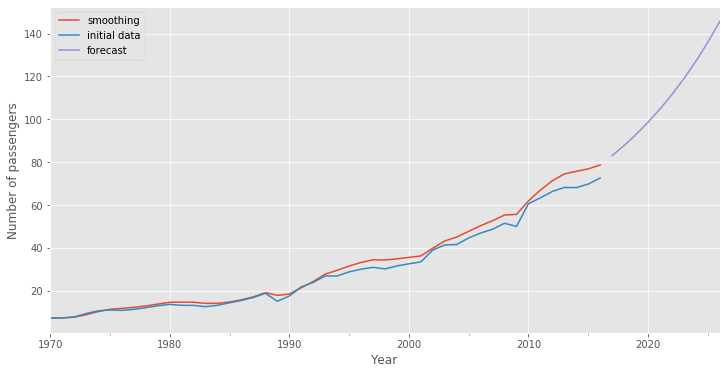

In [13]:
d = pd.DataFrame(pd.date_range('1970-01-01', '2016-01-01', freq='YS'))
d.columns = ['Year']
d = d.set_index('Year')

d['Passengers'] = smooth
d['Passengers'].plot(label='smoothing', figsize=(12, 6))

passengers['Passengers'].plot(figsize=(12, 6), label='initial data')
forecast3['Passengers'].plot(label='forecast')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()